This notebook contains model building, both regression and classification models including cross validation algorithms. In summary, regression models failed to accurately represent the data and a classification approach was used. Random Forest classifer proved essential for this purpose and achieved a 96% accuracy for predicting the default status of a customer. This was achieved by building 200 trees in the Random Forest algorithm and discarting limit balance data and ID. this prediction is bettter than i would expect and therefore i have to consider the possibility of a bias in the data. Given that 70% of the data is from customers who did not default, it could be that my model is biased. On a different notebook, i attempt to predict the limit balance of a customer based on their default status. 

In [69]:
#imports 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy 
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

#cross validation
from sklearn.model_selection import train_test_split

In [78]:
df = pd.read_csv('credit.csv',header=0)
drops = pd.read_csv('drops.csv',header=0)
df = df.drop_duplicates()
pd.set_option('max_columns', None)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,0,3,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,0
1,120000,0,3,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,90000,0,3,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,50000,0,3,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,50000,1,3,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1


# Predicting Default Status

## Building the Models

In [71]:
y1 = df['default payment next month']
X1= df[df.columns.difference(['default payment next month','LIMIT_BAL'])]

y2 = drops['default payment next month']
X2= drops[drops.columns.difference(['default payment next month','LIMIT_BAL'])]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=123)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=123)

rfr = RandomForestRegressor(n_estimators=200, n_jobs=2, random_state=0)
lr = LinearRegression(fit_intercept=True, n_jobs=2)
svr = SVR()
rfc = RandomForestClassifier(n_estimators=200, n_jobs=2, random_state=0)

df_rfr_model = rfr.fit(X1_train, y1_train.values.ravel())
df_lr_model = lr.fit(X1_train, y1_train.values.ravel())
df_svr_model = svr.fit(X1_train, y1_train.values.ravel())
df_rfc_model = rfc.fit(X1_train, y1_train.values.ravel())

drops_rfr_model = rfr.fit(X2_train, y2_train.values.ravel())
drops_lr_model = lr.fit(X2_train, y2_train.values.ravel())
drops_svr_model = svr.fit(X2_train, y2_train.values.ravel())
drops_rfc_model = rfc.fit(X2_train, y2_train.values.ravel())

## Regressor Model Accuracy/Results

In [72]:
algosClassdf = []
algosClassdrops = []

algosClassdf.append(('Random Forest Regressor - Raw Data:     ',df_rfr_model))
algosClassdf.append(('Linear Regression - Raw Data:           ',df_lr_model))
algosClassdf.append(('Support Vector Regression - Raw Data:   ',df_svr_model))

algosClassdrops.append(('Random Forest Regressor - Drops Data:   ',drops_rfr_model))
algosClassdrops.append(('Linear Regression - Drops Data:         ',drops_lr_model))
algosClassdrops.append(('Support Vector Regression - Drops Data: ',drops_svr_model))

#regression
results = []
names = []
for name, model in algosClassdf:
    result = cross_val_score(model, X1,y1, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
for name, model in algosClassdrops:
    result = cross_val_score(model, X2,y2, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [73]:
print('\n')
for i in range(len(names)):
    print(names[i], results[i].mean())



Random Forest Regressor - Raw Data:      0.1730732181649783
Linear Regression - Raw Data:            0.11970940094154496
Support Vector Regression - Raw Data:    -0.08550921841986898
Random Forest Regressor - Drops Data:    0.1698071629739033
Linear Regression - Drops Data:          0.12097041796686096
Support Vector Regression - Drops Data:  -0.08920983139482701


These results show how accuratly a linear regressor model fits the data. The Raw data refers to the clean data, while Drops data excludes the labels with $500,000 credit balance. The values correspond to the cross validation score mean of 3 folds. The higher the average the better the estimators performance.
It is clear to see that a linear model does not fit the data, meaning regression is not the way to tackle this problem, a classifier model is needed. 

## Classification Model Accuracy/Results

In [74]:
df_pred = df_rfc_model.predict(X1_test)
drops_pred = drops_rfc_model.predict(X2_test)

ClassifierClass = []

ClassifierClass.append(('Random Forest Classifier - Raw Data - Accuracy:       ', y1_test, df_pred))
ClassifierClass.append(('Random Forest Classifier - Drops Data - Accuracy:     ', y2_test, drops_pred))

results = []
names = []

for name, y_test, prediction in ClassifierClass:
    result = metrics.accuracy_score(y_test, prediction)
    names.append(name)
    results.append(result)

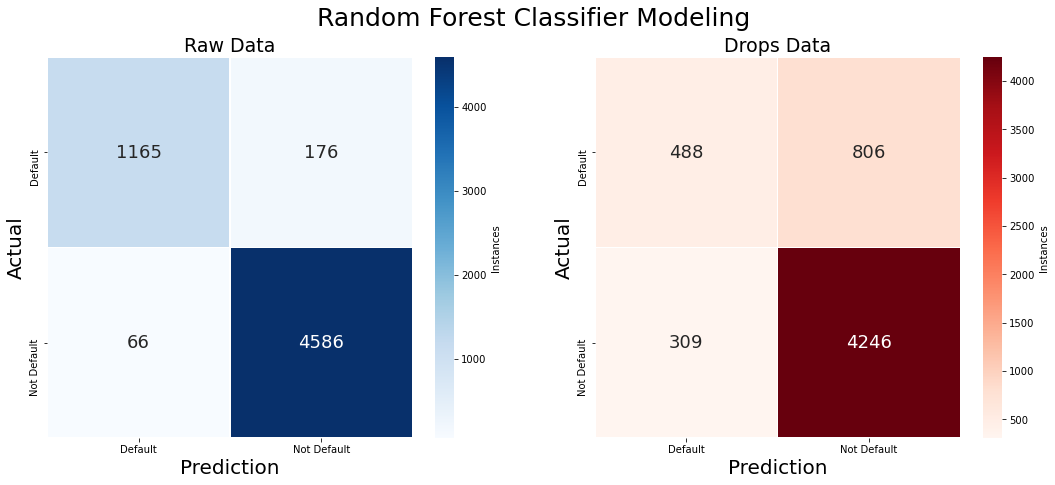

In [75]:
cm1 =confusion_matrix(y1_test, df_pred)
cm2 =confusion_matrix(y2_test, drops_pred)

df_cm1 = pd.DataFrame(cm1, range(2), range(2))
df_cm2 = pd.DataFrame(cm2, range(2), range(2))

#Figure
fig = plt.figure(figsize = (18,7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

Amount = ['Default', 'Not Default']

sns.heatmap(df_cm1, ax=ax1, xticklabels=Amount, yticklabels=Amount, annot=True,fmt="d", annot_kws={"size": 18},cmap="Blues",linewidths=.5,cbar_kws={'label': 'Instances'})
sns.heatmap(df_cm2, ax=ax2, xticklabels=Amount, yticklabels=Amount, annot=True,fmt="d", annot_kws={"size": 18},cmap="Reds",linewidths=.5,cbar_kws={'label': 'Instances'})

ax1.set_xlabel('Predicted',fontsize=20)
ax1.set_ylabel('Actual',fontsize=20)
ax2.set_xlabel('Predicted',fontsize=20)
ax2.set_ylabel('Actual',fontsize=20)
plt.suptitle('Random Forest Classifier Modeling',fontsize=25)

ax1.set(xlabel='Prediction', ylabel='Actual')
ax1.set_title('Raw Data', y=1, fontsize=19)
ax2.set(xlabel='Prediction', ylabel='Actual')
ax2.set_title('Drops Data', y=1, fontsize=19)

plt.show()

In [76]:
for i in range(len(names)):
    print(names[i], results[i].mean())

feature_list = list(X1.columns)
feature_imp = pd.Series(df_rfc_model.feature_importances_, index=feature_list).sort_values(ascending=False)
print('\n','Feature Importance - Raw Data:','\n', feature_imp)

Random Forest Classifier - Raw Data - Accuracy:        0.9596195561488403
Random Forest Classifier - Drops Data - Accuracy:      0.809369122926996

 Feature Importance - Raw Data: 
 PAY_0        0.106014
AGE          0.079852
BILL_AMT1    0.064810
PAY_AMT1     0.056297
BILL_AMT2    0.056136
BILL_AMT3    0.053524
PAY_AMT2     0.052877
BILL_AMT6    0.051941
BILL_AMT4    0.051933
BILL_AMT5    0.051231
PAY_AMT6     0.051074
PAY_AMT3     0.049531
PAY_AMT5     0.047380
PAY_AMT4     0.047358
PAY_2        0.038742
PAY_3        0.030767
PAY_4        0.022488
PAY_5        0.021747
EDUCATION    0.019998
PAY_6        0.018781
MARRIAGE     0.014389
SEX          0.013130
dtype: float64


Using the Random Forest Classifier there is no doubt that it is the model needed for this project. I can predict with 95% accuracy whether a customer will default or not. Furthermore, I tried experimenting using a second set of data (Drops) which ignores the values of $500,000 credit limit since it looks like an anomoaly in the data, an artificial limit set by the company which I thought would not help the model at all. However, there is a 15% difference between the accuracy of the raw data and the drops data, making the raw data much more accurate. Because of this, i will not exclude any data from the model.

In [77]:
print(df.shape, drops.shape)
print('This is ~1000 labels difference between the Raw data and Drops data')

(29965, 24) (29244, 24)
This is ~1000 labels difference between the Raw data and Drops data


However, i do have to note that there are considerably more entries of customers not defaulting rather than defaulting, enough to make me question whether my model is being biased towards not defaulting results. 